In [24]:
# Import Dependencies
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel

## Promotion Dataset

Multiple attributes have been provided around Employee's past and current performance along with demographics.

Features:

- employee_id: Unique ID for employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won?: if awards won during previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

In [25]:
# Read the csv file into a pandas DataFrame called `promotions_df`

### YOUR CODE HERE
promotions_df = pd.read_csv("../Resources/promotions.csv")
promotions_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [26]:
# Create `X` and `y` datasets

### YOUR CODE HERE
X = promotions_df.drop('is_promoted', axis=1)
y = promotions_df['is_promoted']

In [27]:
# Dummy encode the `X` data into numerical features

### YOUR CODE HERE
X = pd.get_dummies(X,prefix="Label")

In [28]:
# Divide the data into training and testing sets

### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
# Create a StandardScaler() model and fit it to the training data

### YOUR CODE HERE
scaler = StandardScaler().fit(X_train)

In [30]:
# Transform the training and testing data by using the scaler model

### YOUR CODE HERE
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Use Random Forest to predict promotions

In [31]:
# Fit a Random Forest Classifier model with 500 trees and print training and testing scores

### YOUR CODE HERE
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11094
           1       0.85      0.28      0.42      1071

    accuracy                           0.93     12165
   macro avg       0.89      0.64      0.69     12165
weighted avg       0.93      0.93      0.92     12165

Training Score: 0.9996985888477874
Testing Score: 0.9321002877106453


In [32]:
# Calculate feature importance from the fitted random forest model

### YOUR CODE HERE
features = clf.feature_importances_
print(features)

[2.62627551e-02 1.52537816e-01 6.29238568e-02 1.28975765e-01
 2.94289582e-02 3.08924233e-01 1.05864933e-02 7.16626516e-03
 4.17658676e-03 2.26907555e-03 1.85049247e-02 1.06634969e-02
 4.87173783e-03 1.98762220e-02 9.87247823e-03 2.72189663e-03
 2.78909618e-03 3.66262190e-03 1.33011732e-03 6.68500896e-03
 3.15048310e-03 6.66926724e-03 4.24269068e-03 3.79593147e-03
 7.38030896e-06 2.63387442e-03 1.23159979e-02 2.69059317e-03
 1.85715281e-03 8.12222084e-03 4.82946883e-03 1.54835772e-03
 3.44068592e-03 5.19544918e-03 5.40218679e-03 4.33161645e-03
 2.31545857e-03 1.82723019e-03 2.58921601e-03 3.87136674e-03
 1.89864149e-03 1.05065721e-03 7.41094364e-04 5.46469565e-03
 1.78793757e-03 1.87715138e-03 9.32610513e-03 2.90447001e-03
 7.11725734e-04 7.18288372e-03 1.01376177e-03 6.97849446e-03
 1.30875494e-02 1.30208574e-02 1.66871401e-02 4.31404387e-03
 1.68867567e-02]


In [33]:
# Visualize the feature importance 

### YOUR CODE HERE
px.bar(x=X.columns, y=features,labels={"x":"Features","y":"Score Features"})

In [34]:
# Perofrm feature selection using sklearns SelectFromModel module

### YOUR CODE HERE
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [35]:
# Use the `.transofrm()` function to transform the scaled `X_train` and `X_test` data 
# to return a new dataframe with only the features from the previous step

### YOUR CODE HERE
X_train_new_scaled = scaler.transform(X_train)
X_test_new_scaled = scaler.transform(X_test)

selFeatures = pd.DataFrame(X_train_new_scaled)
selFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.417343,0.977771,-1.063424,2.997848,-0.153396,0.558868,-0.322959,-0.218434,-0.215457,-0.134133,...,-0.110343,-0.081191,0.673955,-0.097977,-0.659077,-0.661901,0.661901,0.894973,-0.149132,-0.856195
1,-0.417343,-0.476712,0.527299,-0.312276,-0.153396,-1.248551,-0.322959,-0.218434,-0.215457,-0.134133,...,-0.110343,-0.081191,0.673955,-0.097977,-0.659077,-0.661901,0.661901,0.894973,-0.149132,-0.856195
2,-0.417343,0.316642,-1.858786,-0.312276,-0.153396,-0.269532,-0.322959,-0.218434,-0.215457,-0.134133,...,-0.110343,-0.081191,0.673955,-0.097977,-0.659077,-0.661901,0.661901,0.894973,-0.149132,-0.856195
3,-0.417343,-1.137840,0.527299,-0.785151,-0.153396,0.408250,-0.322959,-0.218434,-0.215457,-0.134133,...,-0.110343,-0.081191,0.673955,-0.097977,-0.659077,-0.661901,0.661901,-1.117352,-0.149132,1.167958
4,-0.417343,-0.344486,-0.268063,-0.312276,-0.153396,-1.097933,-0.322959,-0.218434,-0.215457,-0.134133,...,-0.110343,-0.081191,0.673955,-0.097977,-0.659077,-0.661901,0.661901,-1.117352,6.705481,-0.856195


In [36]:
# Fit a model and print training and testing scores with 500 trees

### YOUR CODE HERE
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(selFeatures, y_train)
y_pred = clf.predict(X_test_new_scaled)

print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(selFeatures, y_train)}')
print(f'Testing Score: {clf.score(X_test_new_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11094
           1       0.85      0.28      0.42      1071

    accuracy                           0.93     12165
   macro avg       0.89      0.64      0.69     12165
weighted avg       0.93      0.93      0.92     12165

Training Score: 0.9996985888477874
Testing Score: 0.9321002877106453


## Use K Nearest Neighbors to predict promotions

In [37]:
# Fit a K Nearest Neighbors model and loop through different k values of 1 to 20 by 2
# to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.

### YOUR CODE HERE
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.878
k: 3, Train/Test Score: 0.934/0.908
k: 5, Train/Test Score: 0.925/0.914
k: 7, Train/Test Score: 0.921/0.915
k: 9, Train/Test Score: 0.919/0.915
k: 11, Train/Test Score: 0.918/0.914
k: 13, Train/Test Score: 0.918/0.914
k: 15, Train/Test Score: 0.917/0.913
k: 17, Train/Test Score: 0.917/0.913
k: 19, Train/Test Score: 0.917/0.914


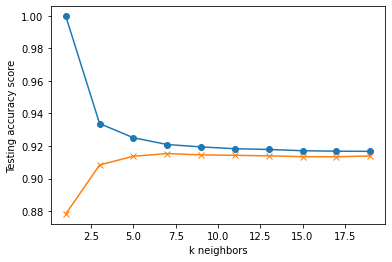

In [38]:
# Plot the results of the train and test scores from the previous loop   

### YOUR CODE HERE
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [39]:
# Select the `k` that provides the best accuracy where the classifier starts to stablize

### YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.915
